### Task 2
#### Perform data cleaning and exploratory data analysis (EDA) on a dataset of your choice, such as the Titanic dataset from Kaggle. Explore the relationships between variables and identify patterns and trends in the data.



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df = pd.read_csv(r"C:\Users\Yadhnesh\Dropbox\PC\Downloads\tested.csv")

In [4]:
df.shape #this shows number of rows and columns

(418, 12)

In [5]:
df.head() 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


##### We can see that the column named Cabin has many null values, which we do not require. We shall remove the whole column

In [6]:
df.drop(['Cabin'], axis = 1, inplace = True)
# this deletes the column

In [7]:
df.shape

(418, 11)

##### We have removed one column that was not required.

In [8]:
df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
413,False,False,False,False,False,True,False,False,False,False,False
414,False,False,False,False,False,False,False,False,False,False,False
415,False,False,False,False,False,False,False,False,False,False,False
416,False,False,False,False,False,True,False,False,False,False,False


In [9]:
df.isnull().sum()

PassengerId     0
Survived        0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Ticket          0
Fare            1
Embarked        0
dtype: int64

##### We can see that there are 86 null values in the column Age. We shall remove those null values

In [10]:
df.dropna(inplace = True)

In [11]:
df.shape #this is the final number of rows and columns after deleting the null values

(331, 11)

In [13]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object

In [ ]:
##### Let us change the datatype of Age from float64 to int64

In [14]:
df['Age'] = df['Age'].astype('int')

df.dtypes

In [16]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47,1,0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62,0,0,240276,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",male,27,0,0,315154,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22,1,1,3101298,12.2875,S


##### We have completed the data cleaning process

### Exploratory Data Analysis (EDA)

#### Let us see the number of people who survived through a pie chart

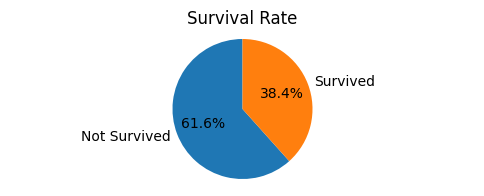

In [27]:
survival_counts = df['Survived'].value_counts()

labels = ['Not Survived', 'Survived']
sizes = survival_counts.values

plt.figure(figsize=(6, 2))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle = 90)

plt.title('Survival Rate')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

#### Let us find out what was the Pclass of the people who survived

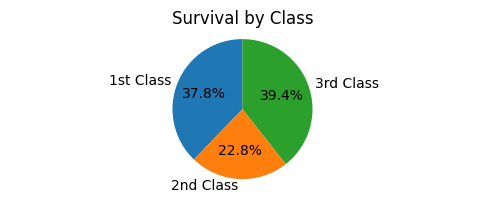

In [32]:
survival_counts = df.groupby('Pclass')['Survived'].sum()

# Step 3: Create and display the pie chart
labels = ['1st Class', '2nd Class', '3rd Class']
sizes = survival_counts.values

plt.figure(figsize=(6, 2))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

plt.title('Survival by Class')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

##### The most survivors were from the 3rd Class

#### Let us see the Sex Ratio

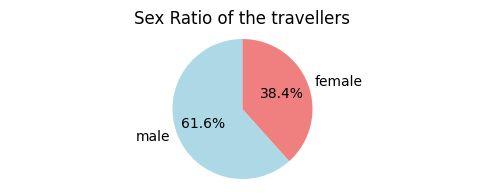

In [55]:
sex_counts = df['Sex'].value_counts()

# Step 3: Create and display the pie chart
labels = sex_counts.index
sizes = sex_counts.values

plt.figure(figsize=(6, 2))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightcoral'])

plt.title('Sex Ratio of the travellers')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

def categorize_age_group(row):
    age = row['Age']
    sex = row['Sex']
    
    if age < 15:
        return 'Children'
    elif age >= 15 and sex == 'male':
        return 'Adult Male'
    elif age >= 15 and sex == 'female':
        return 'Adult Female'
    else:
        return 'Unknown'  # Handle any other cases if needed

# Step 3: Apply the function to create the new 'Age Group' column
df['Age Group'] = df.apply(categorize_age_group, axis=1)

# Display the updated DataFrame with the new 'Age Group' column
print(df.head())

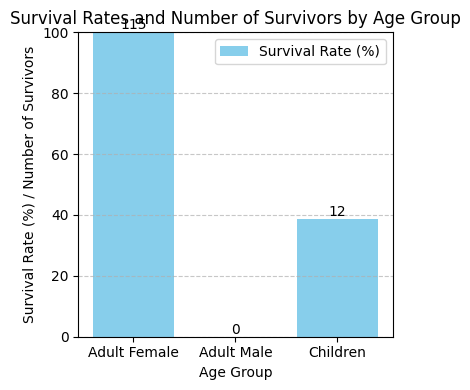

In [51]:
grouped_data = df.groupby('Age Group')['Survived'].agg(['mean', 'sum'])
grouped_data['count'] = df.groupby('Age Group')['Survived'].sum()

# Step 3: Create and display the bar graph
plt.figure(figsize=(4, 4))

# Plotting survival rates as percentages
plt.bar(grouped_data.index, grouped_data['mean'] * 100, color='skyblue', label='Survival Rate (%)')

# Adding number of survivors as text on top of bars
for i, count in enumerate(grouped_data['count']):
    plt.text(i, grouped_data['mean'].iloc[i] * 100 + 1, f'{int(count)}', ha='center', color='black', fontsize=10)

plt.xlabel('Age Group')
plt.ylabel('Survival Rate (%) / Number of Survivors')
plt.title('Survival Rates and Number of Survivors by Age Group')
plt.xticks(rotation=0)
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()

##### This brings out an interesting insight. Let us find out the number of males who survived at all

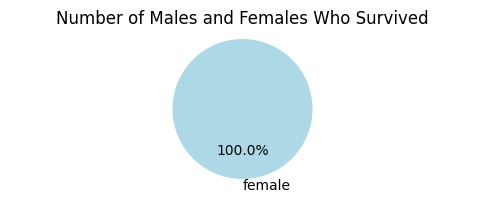

In [54]:
survived_data = df[df['Survived'] == 1]

# Step 3: Count males and females who survived
survived_count = survived_data['Sex'].value_counts()

# Step 4: Create and display the pie chart
labels = survived_count.index
sizes = survived_count.values

plt.figure(figsize=(6, 2))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightcoral'])

plt.title('Number of Males and Females Who Survived')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

##### Through the chart, we see that all the survivors were females. The sacrifice of the males is commendable

#### Conclusion:
##### From the EDA, my findings are that all of the survivors were females and about 40% of them were from the 3rd class.